In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv(r"D:\Data_Science\datasets\netflix\netflix_titles.csv")
df.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1920,s1921,Movie,The Book of Sun,Faris Godus,"Baraa Alem, Ismail Alhassan, Ahmed Saddam, Soh...",Saudi Arabia,"October 1, 2020",2020,TV-14,120 min,"Comedies, Independent Movies, International Mo...",A high school senior sets out to make a no-bud...
6616,s6617,Movie,Dismissed,Benjamin Arfmann,"Kent Osborne, Dylan Sprouse, Rae Gray, Alycia ...",United States,"February 19, 2018",2017,TV-14,87 min,Thrillers,An intelligent but intense honor student traum...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8803 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8803 non-null   object
 1   type          8803 non-null   object
 2   title         8803 non-null   object
 3   director      6172 non-null   object
 4   cast          7978 non-null   object
 5   country       7973 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8803 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8803 non-null   object
 11  description   8803 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.1+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_1944\35656532.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df=df[~df.rating.str.contains(r"((\d)+ min)")]


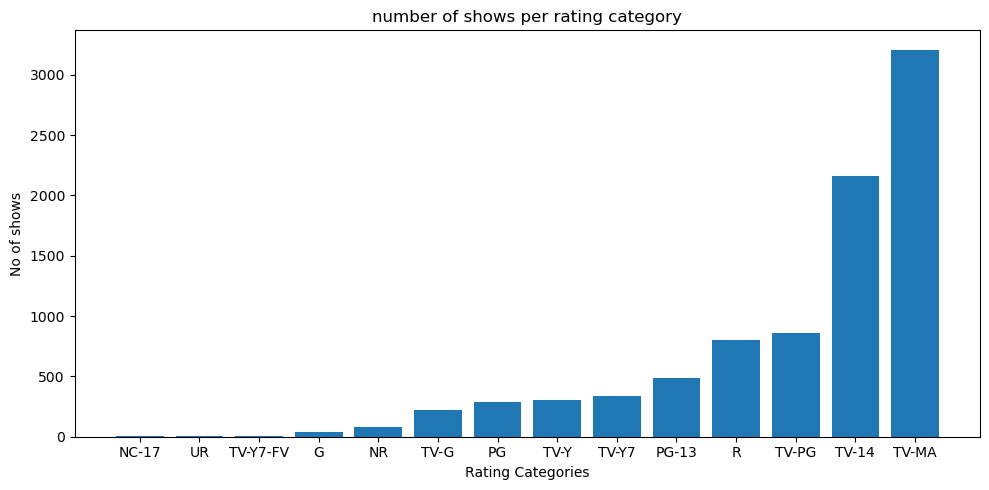

In [23]:
#Medium: Show the number of shows per rating category (TV-MA, TV-14, etc.).
df=df.dropna(subset=['rating'])
df=df[~df.rating.str.contains(r"((\d)+ min)")]
df.rating.unique
df1=df.groupby("rating")["show_id"].count().sort_values()
plt.figure(figsize=(10,5))
plt.title("number of shows per rating category")
plt.bar(df1.index,df1.values)
plt.xlabel("Rating Categories")
plt.ylabel("No of shows")
#plt.xticks(ticks=df1.index,labels=df1.values) may be to set custom labels on x-axis
plt.tight_layout()
plt.show()

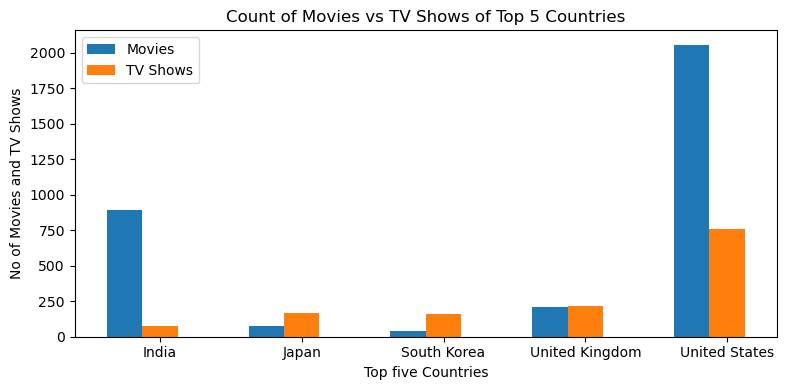

In [46]:
#Difficult: For the top 5 countries, plot a grouped bar chart showing the count of Movies vs TV Shows.
df1=df.groupby('country')['show_id'].count().sort_values(ascending=False).head(5)
l1=list(df1.index)
del df1
df2=df[df['country'].isin(l1)]
df1=df2.groupby('country')['type'].value_counts().sort_index()
inf1= df1.xs('Movie',level='type')
inf2= df1.xs('TV Show',level='type')
label=inf1.index
x=np.arange(len(label))
plt.figure(figsize=(8,4))
plt.title("Count of Movies vs TV Shows of Top 5 Countries")
plt.bar(x-0.25,inf1.values,width=0.25,label="Movies")
plt.bar(x,inf2.values,width=0.25,label="TV Shows")
plt.xticks(ticks=x,labels=label)
plt.xlabel("Top five Countries")
plt.ylabel("No of Movies and TV Shows")
plt.tight_layout()
plt.legend()
plt.show()

<Axes: xlabel='country'>

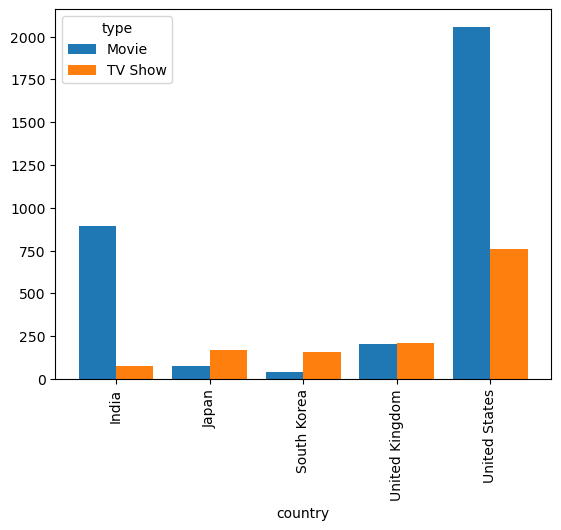

In [51]:
df_grouped = df2.groupby(['country', 'type']).size().unstack(fill_value=0)
df_grouped.plot(kind='bar', width=0.8)


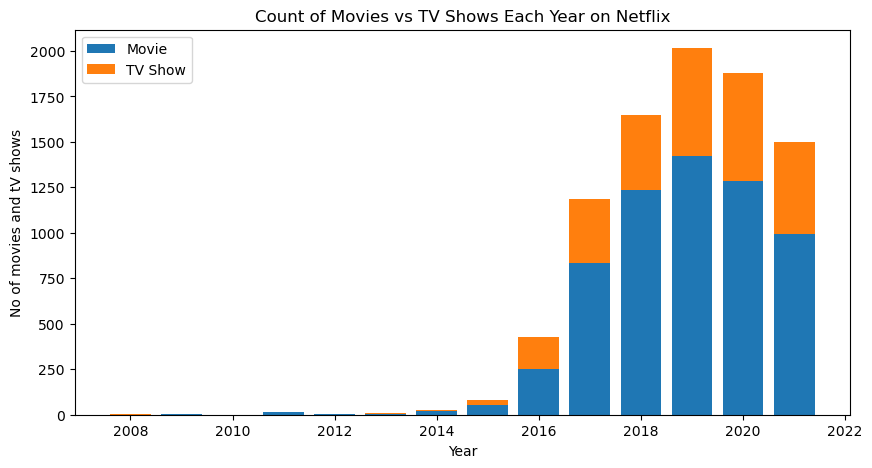

In [85]:
#Stack bar chart
#Medium: For each year, plot a stacked bar showing the count of Movies vs TV Shows
df=df.dropna(subset=['date_added'])
df['Year']=df['date_added'].str.split(",").str[1].str.strip().astype('Int16')
df1=df.groupby(["Year","type"]).size().sort_index()
info1=df1.xs('Movie',level='type')
info2=df1.xs('TV Show',level='type')
# common_index = info1.index.intersection(info2.index)
# # Reindex both Series to that common index
# info1_aligned = info1.loc[common_index]
# info2_aligned = info2.loc[common_index]  

# Get the union of both indexes
all_indexes = info1.index.union(info2.index)

# Reindex both Series, filling missing values with 0
info1_full = info1.reindex(all_indexes, fill_value=0)
info2_full = info2.reindex(all_indexes, fill_value=0)

plt.figure(figsize=(10,5))
plt.title("Count of Movies vs TV Shows Each Year on Netflix")
plt.bar(info1_full.index, info1_full.values, label="Movie")
plt.bar(info2_full.index, info2_full.values, bottom=info1_full.values, label="TV Show")
plt.ylabel("No of movies and tV shows")
plt.xlabel("Year")
plt.legend()
plt.show()


In [86]:
#Difficult: For each year, plot a stacked bar of shows by type and rating (TV-MA, TV-14, etc.).
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      6169 non-null   object
 4   cast          7965 non-null   object
 5   country       7961 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
 12  Year          8790 non-null   Int16 
dtypes: Int16(1), int64(1), object(11)
memory usage: 918.5+ KB


In [ ]:
#Stack bar chart
#Difficult: For each year, plot a stacked bar of shows by type and rating (TV-MA, TV-14, etc.).
df=df.dropna(subset=['date_added'])
df['Year']=df['date_added'].str.split(",").str[1].str.strip().astype('Int16')
df1=df.groupby(["Year","type","rating"]).size().sort_index()




In [88]:
df1=df.groupby(["Year","type","rating"]).size().sort_index()

In [89]:
df1

Year  type     rating
2008  Movie    TV-MA       1
      TV Show  TV-MA       1
2009  Movie    TV-MA       2
2010  Movie    NR          1
2011  Movie    TV-14       5
                        ... 
2021  TV Show  TV-G       24
               TV-MA     233
               TV-PG      39
               TV-Y       41
               TV-Y7      42
Length: 157, dtype: int64

In [93]:
info1=df1.xs('Movie',level='type')
#info2=df1.xs('TV Show',level=['type','rating'])
info1

Year  rating
2008  TV-MA       1
2009  TV-MA       2
2010  NR          1
2011  TV-14       5
      TV-MA       3
               ... 
2021  TV-G       20
      TV-MA     256
      TV-PG      58
      TV-Y       16
      TV-Y7      45
Length: 104, dtype: int64

<Axes: xlabel='Year,type'>

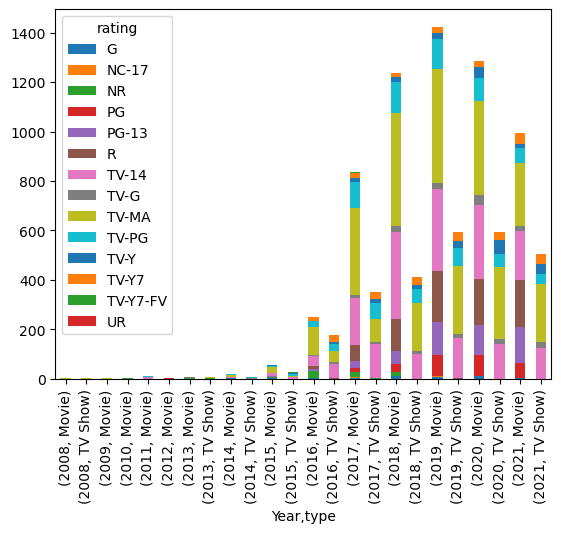

In [98]:
df.pivot_table(index=["Year", "type"], columns="rating", values="show_id",aggfunc='count', fill_value=0).plot(kind='bar',stacked=True,width=0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_1944\196541385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


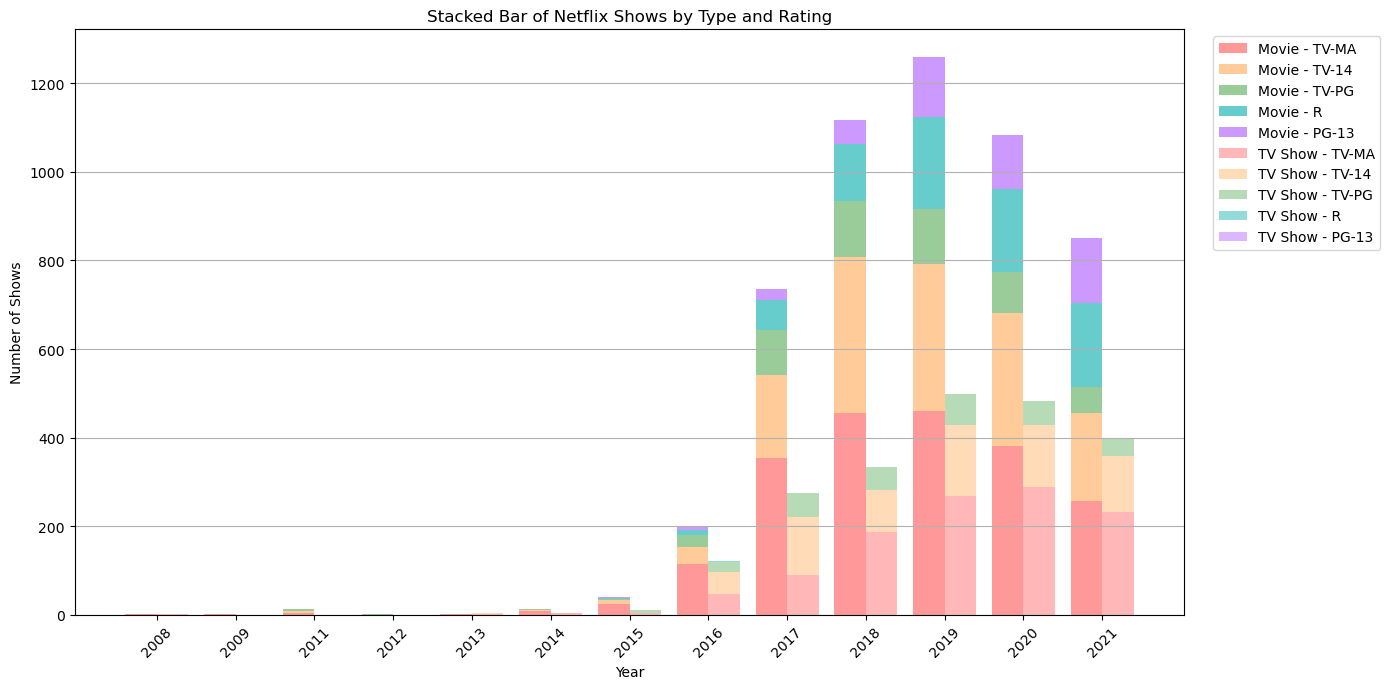

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parse and clean
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])
df['Year'] = df['date_added'].dt.year

# Top 5 ratings for clarity
top_ratings = df['rating'].value_counts().nlargest(5).index

# filter to those
filtered = df[df['rating'].isin(top_ratings)]

# group by year/type/rating
counts = (
    filtered.groupby(['Year', 'type', 'rating'])
    .size()
    .reset_index(name='count')
)

# pivot so columns are MultiIndex (type, rating)
pivot = counts.pivot_table(
    index='Year',
    columns=['type', 'rating'],
    values='count',
    fill_value=0
)

# years
years = pivot.index

# set up plot
fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.4
x = np.arange(len(years))

# color palette
colors = ['#FF9999', '#FFCC99', '#99CC99', '#66CCCC', '#CC99FF']

# stack for movies (left)
bottom = np.zeros(len(years))
for i, rating in enumerate(top_ratings):
    counts = pivot[('Movie', rating)] if ('Movie', rating) in pivot.columns else np.zeros(len(years))
    ax.bar(x - bar_width/2, counts, bar_width, bottom=bottom, color=colors[i], label=f"Movie - {rating}")
    bottom += counts

# stack for tv shows (right)
bottom = np.zeros(len(years))
for i, rating in enumerate(top_ratings):
    counts = pivot[('TV Show', rating)] if ('TV Show', rating) in pivot.columns else np.zeros(len(years))
    ax.bar(x + bar_width/2, counts, bar_width, bottom=bottom, color=colors[i], alpha=0.7, label=f"TV Show - {rating}")
    bottom += counts

# x-ticks
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Shows")
ax.set_title("Stacked Bar of Netflix Shows by Type and Rating")
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y')
plt.tight_layout()
plt.show()
